In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [5]:
# Get only the cubes that have our line of interest in them
mol_tag = 34504
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=14>
   FREQ     ERR    LGINT    DR    ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l        name       Lab 
   MHz      MHz   MHz nm2        1 / cm          u                                                                                                            
 float64  float64 float64 int64 float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64      str15       bool
--------- ------- ------- ----- -------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- --------------- -----
85593.967    0.07 -5.1377     3  292.316    76    34  5041   404     9     1     8     3    --    --    10     2     9     3    --    -- CH3O-18-H,v=0-2 False
85710.028    2.11 -12.522     3  861.472   148    34  5041   404    18     5    14     6    --    --    17     8     9     6    --    -- CH3O-18-H,v=0-2 False
85710.029    2.11 -12.522  

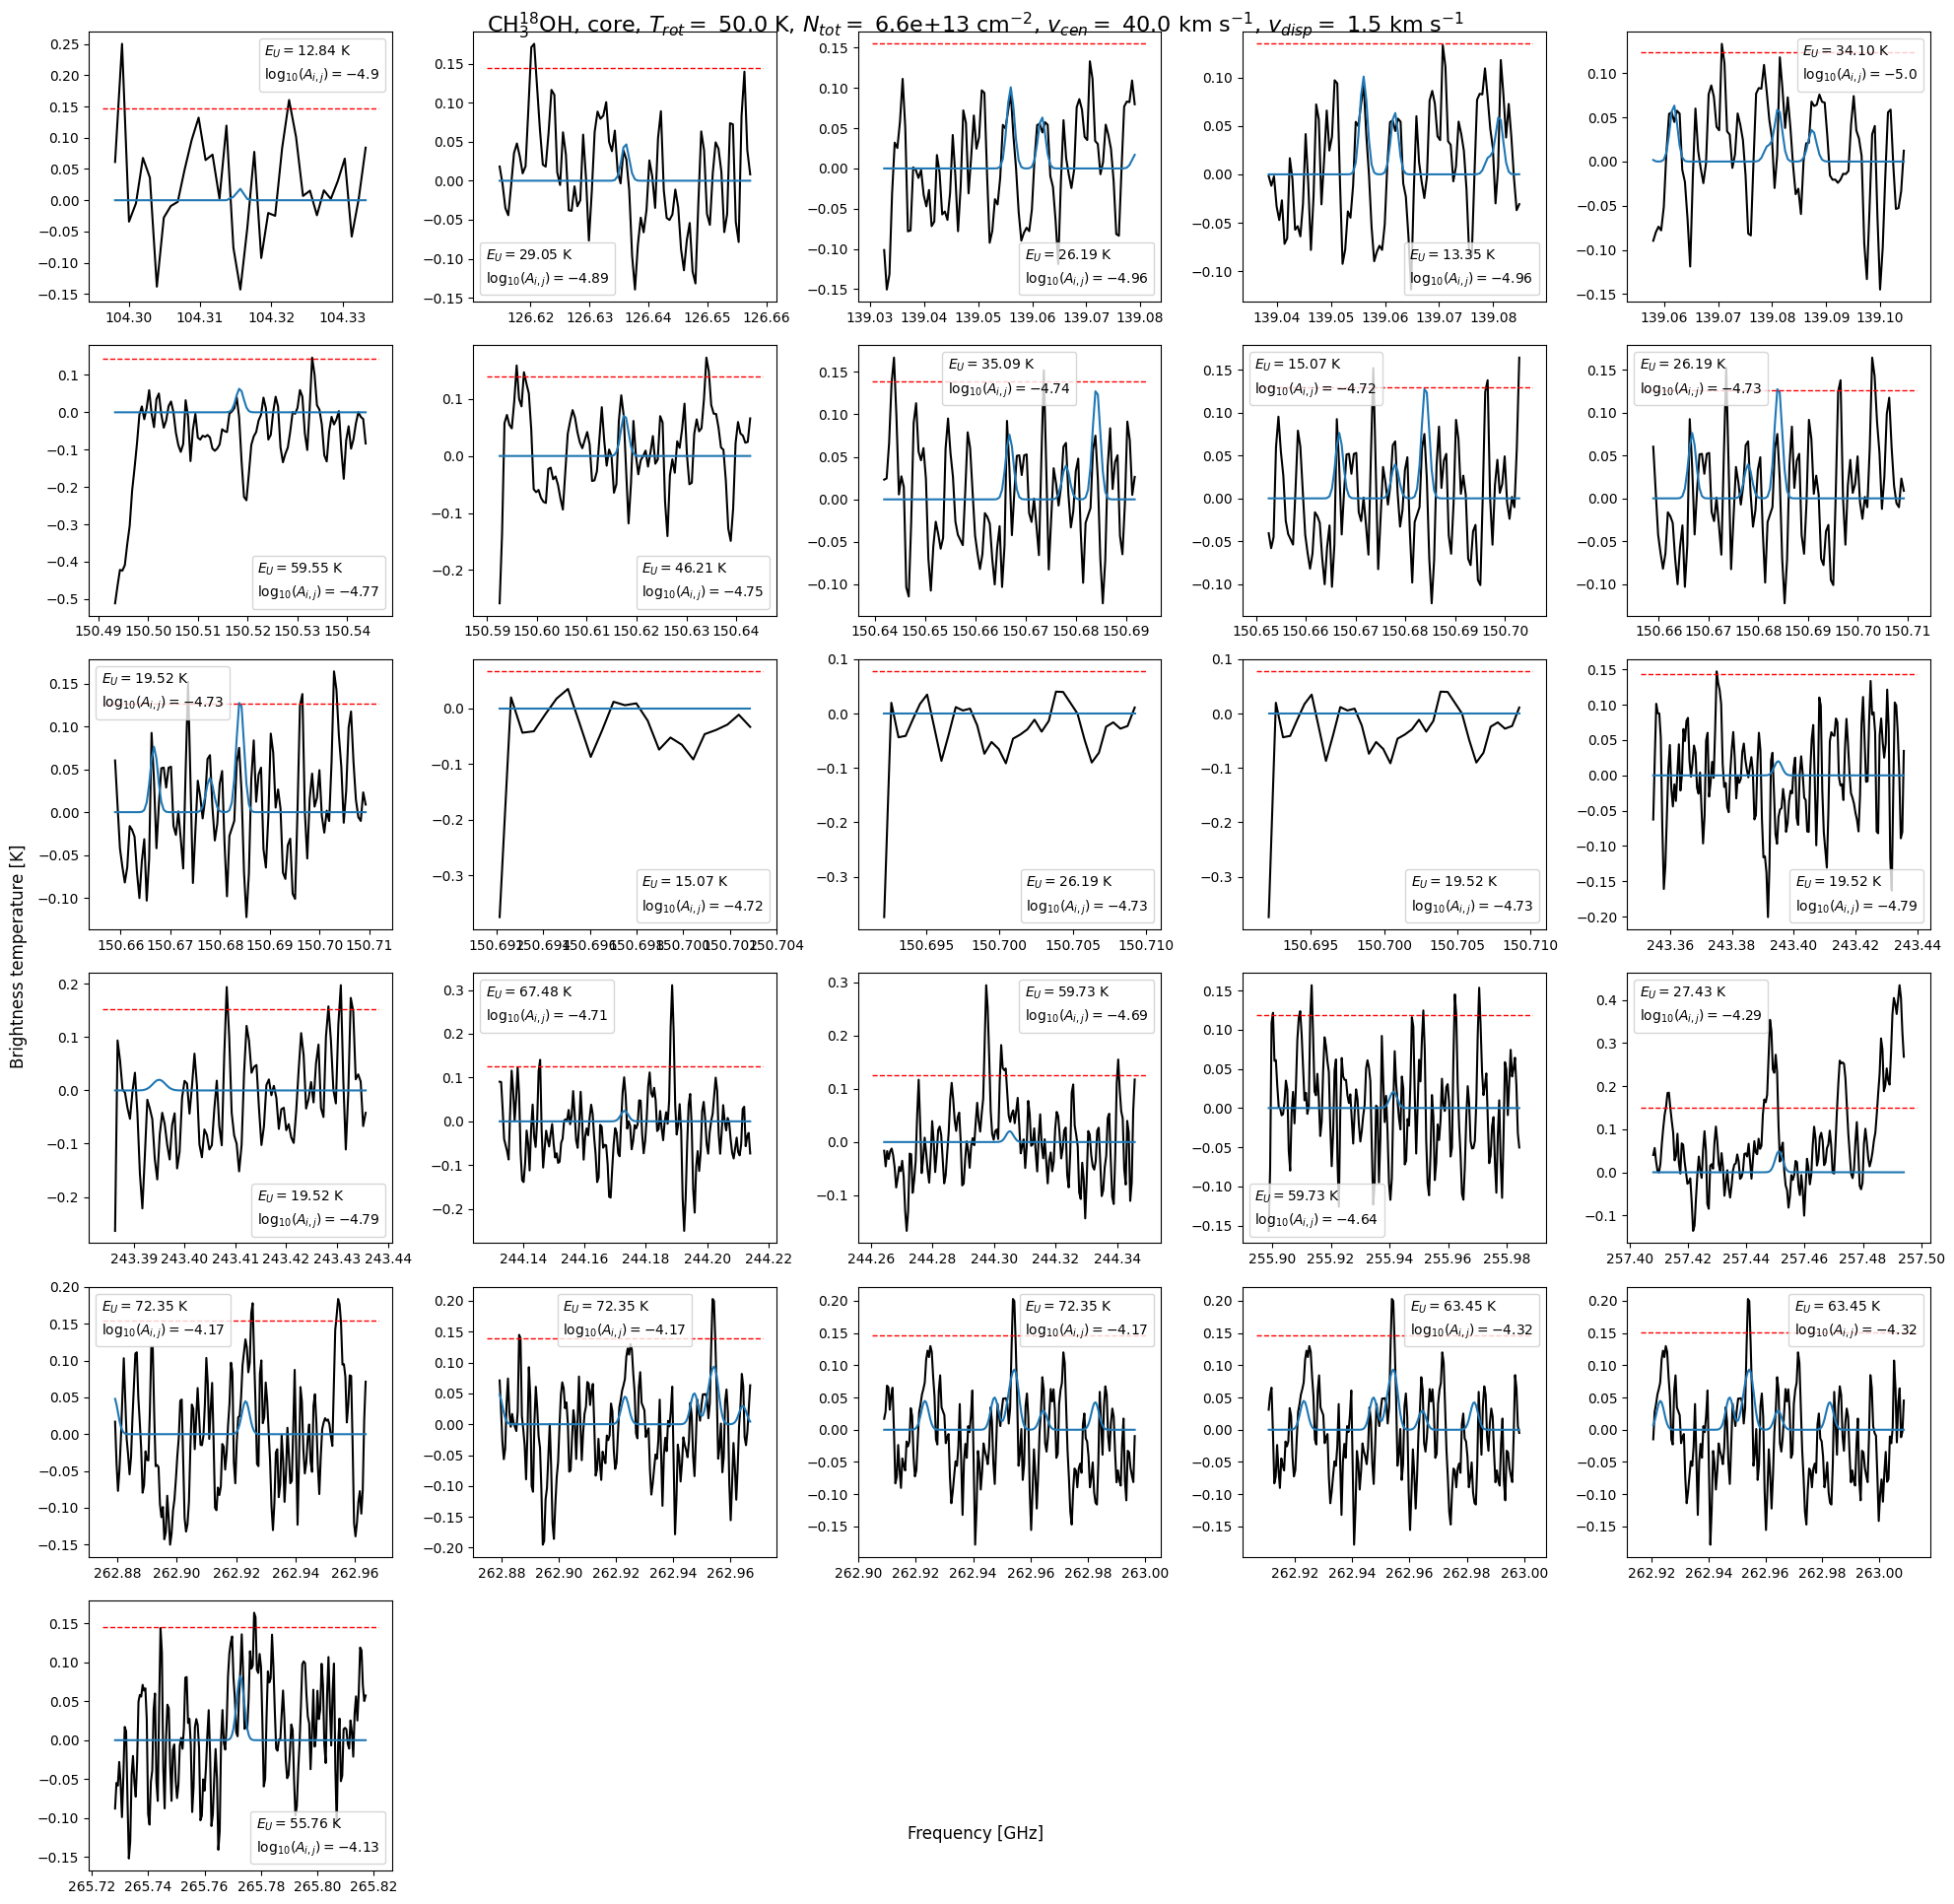

In [22]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 6.6e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=20, 
               nrows=6, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=f'CH$_3^{{18}}$OH', 
               extr_type="coord", crd=crd, EU_cutoff_K=75, show_2_sigma=True)

In [23]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

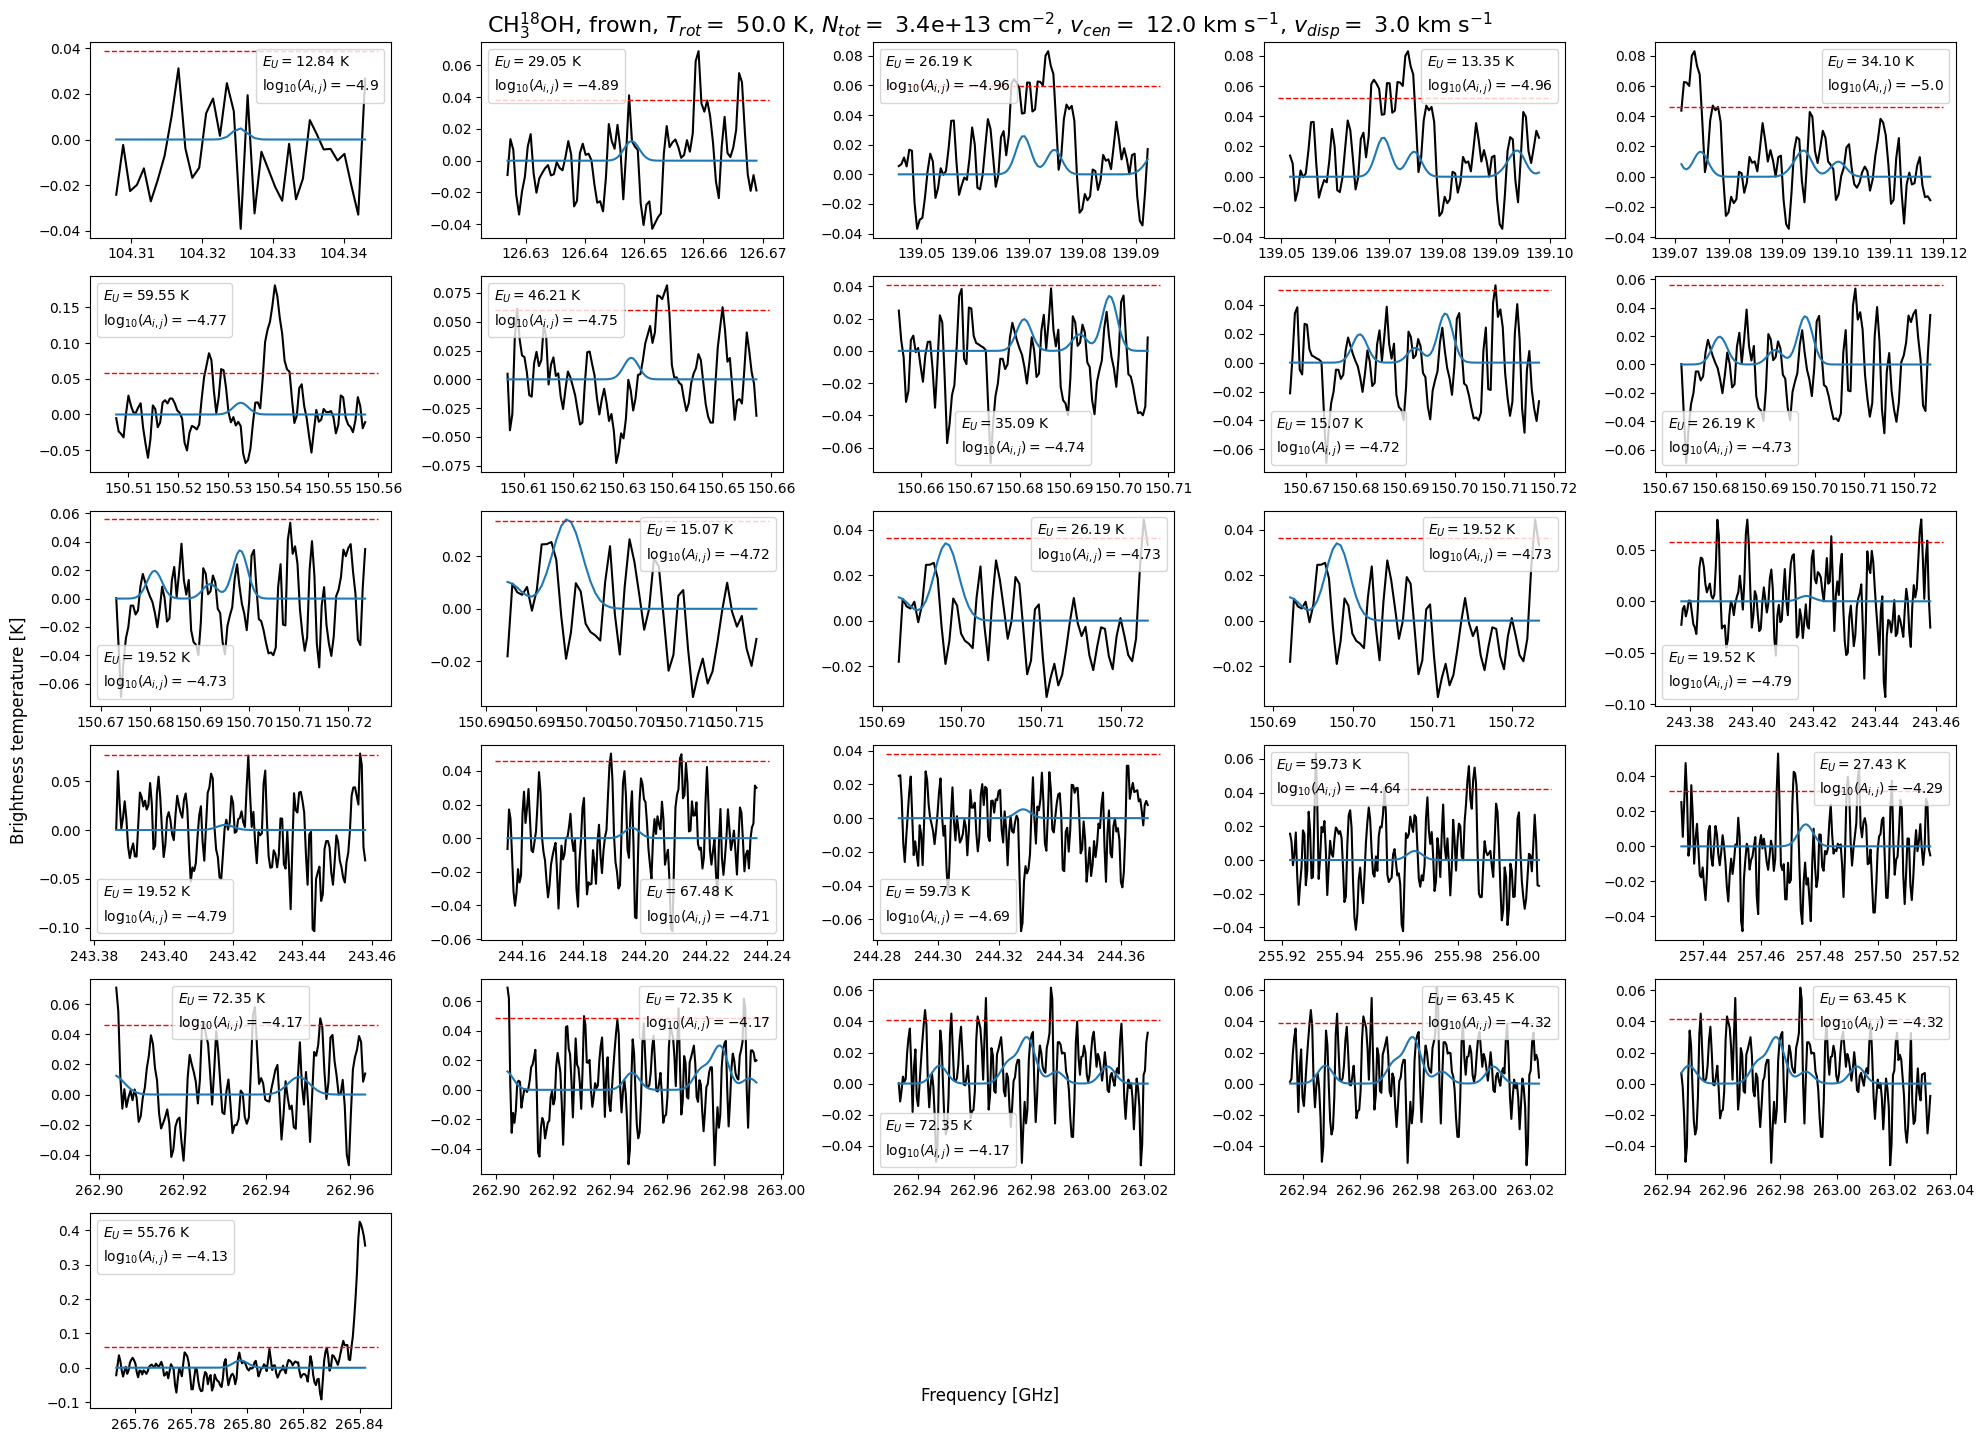

In [37]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 3.4e+13, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=15, 
                       nrows=6, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'CH$_3^{{18}}$OH', 
                       extr_type="reg", just_data= False, EU_cutoff_K=75, show_2_sigma=True, return_freqs=True)

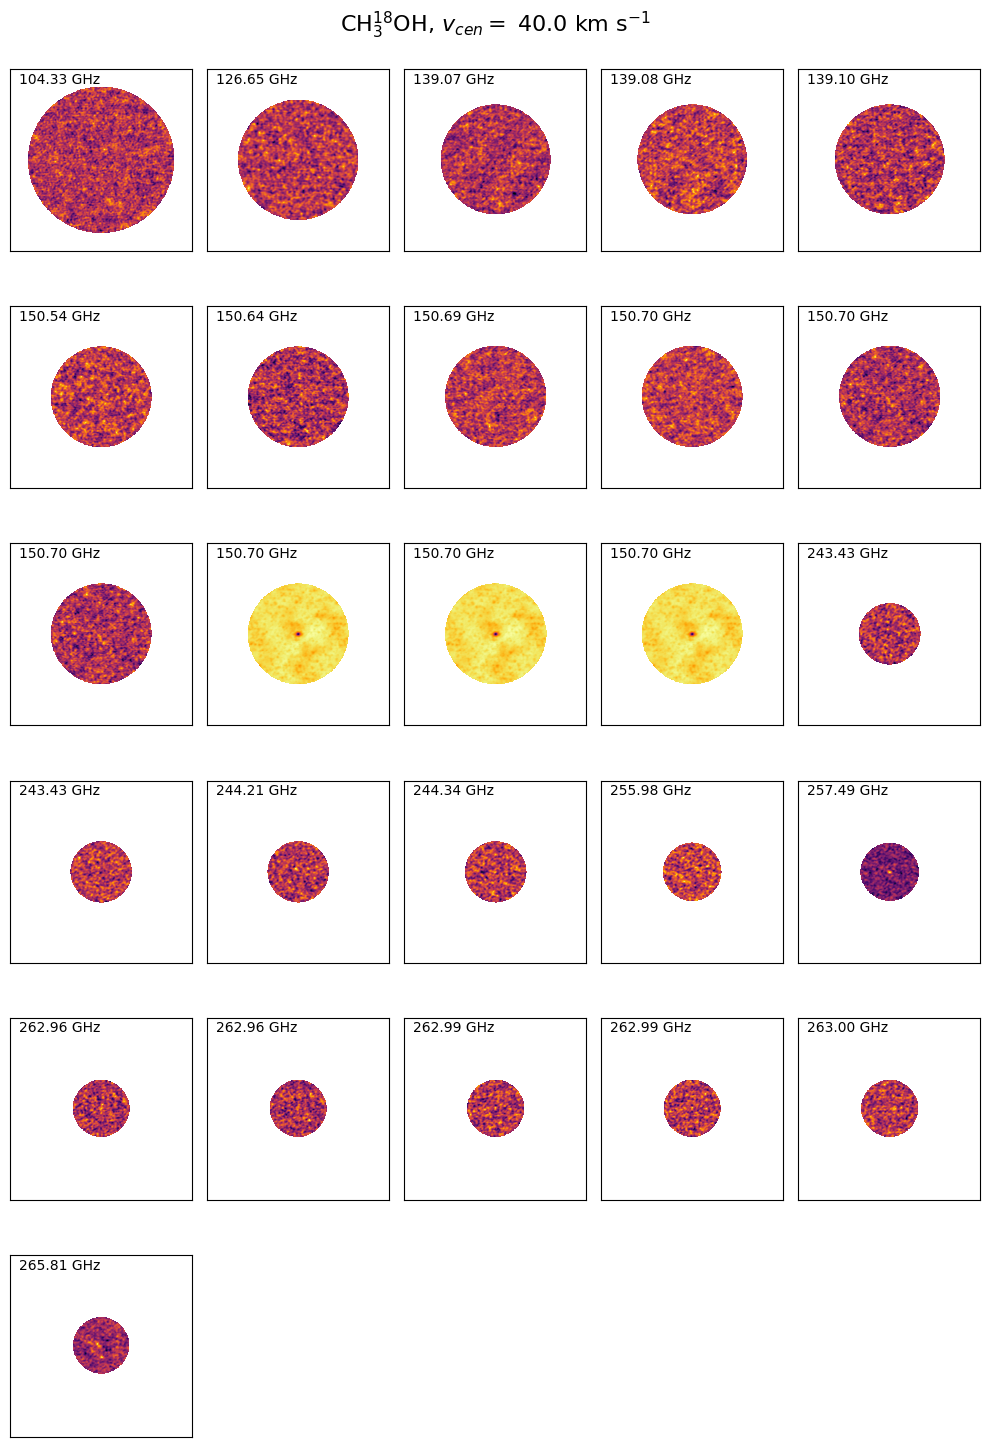

In [38]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=15, nrows=6, ncols=5, name_for_plot=f'CH$_3^{{18}}$OH')

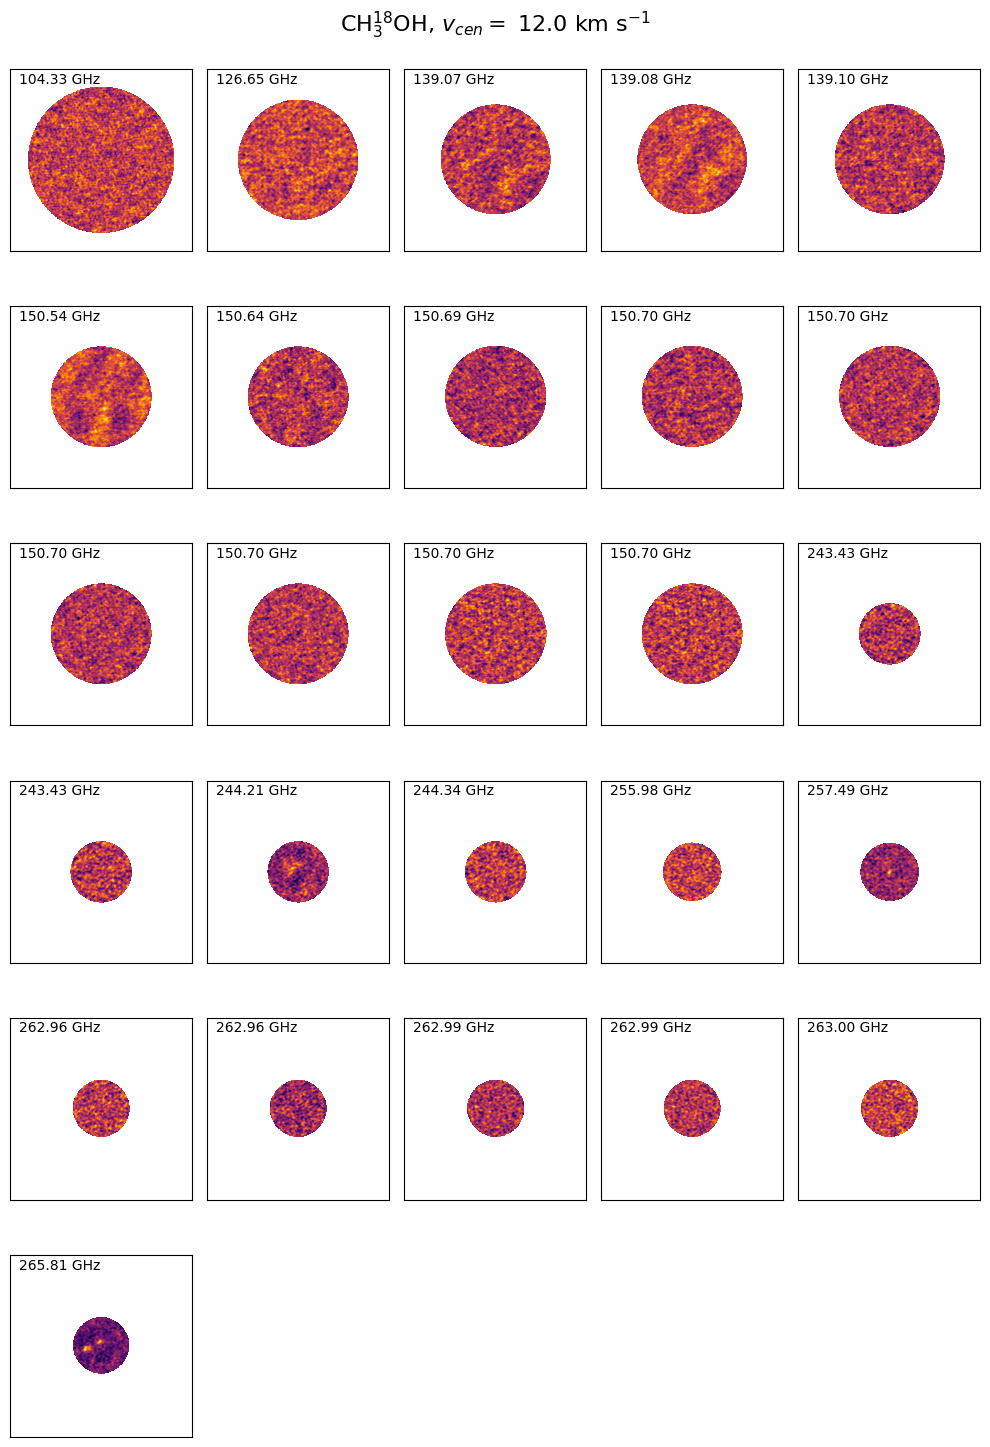

In [39]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=10, fig_height=15, nrows=6, ncols=5, name_for_plot=f'CH$_3^{{18}}$OH')